### How can data help us heal communities at high risk for suicide?

A person or vehicle is hit by a train about once every three hours.

This results in approximately 700 deaths per year, by accident and by suicide.

By creating descriptive models that examine empiric data on train fatalities and predictive models that can anticipate accidents and suicide attempts, we can decrease the number of deaths that occur and focus on communities that are at disproportinately high risk. Good data can be a focus national efforts to heal areas impacted by suicide, and to promote smart planning and routing to prevent accidents.

Data link: https://drive.google.com/file/d/0B-velHZJGPpOVF9ueHJsNWI0ZUk/view

**Useful Links:**

http://transweb.sjsu.edu/PDFs/research/1129-2-preventing-suicide-on-US-rail-systems.pdf

http://railwaysuicideprevention.com/railway-fatalities/overview.html#suicide

http://safetydata.fra.dot.gov/OfficeofSafety/default.aspx

### EDA

In [1]:
# coding: utf-8
import csv as csv
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MultiLabelBinarizer

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import ShuffleSplit
%matplotlib inline

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
#setup filepaths for data 
folderpath = 'data'
# File paths
inputfile = folderpath + '/ALLCASUALTIES.csv'

In [3]:
# function to join relevant datasets together
def load(filepath):
    df = pd.read_csv(filepath, header=0 ,parse_dates=True)    
    #map_RAILROAD={'YN':0,'WP':1,'WSR':2,'WLO':3,}
    #df['RAILROAD'].replace(RAILROAD, inplace=True)
    #Data Engineering        
    return df

In [4]:
data_df = load(inputfile)

/opt/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (5,6,7,9,10,14,17,19,29,30,32,33,34,35,36,38,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(1067153, 50)


,IYR,IMO,RAILROAD,INCDTNO,TYPPERS,JOBCODE,NATINJ,LOCATION,IFATAL,OCCODE,...,TOOLS,INJCAUS,HZMEXPOS,TERMINAT,NARR1,NARR2,NARR3,COVERDATA,LATITUDE,LONGITUD
0,75,12,YN,1275001,A,615,20,3,NaN,301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


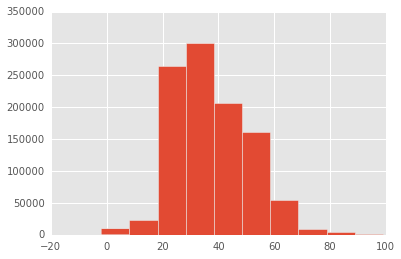

In [6]:
#visualize the data
data_df['AGE'].hist()
print data_df.shape
data_df[:1]

In [45]:
def feature_metrics(df, field):
    print "Unique values of " + field + ": " + str(len(df[field].value_counts()))
    print "Unique counts of " + field + ":\n"
    print df[field].value_counts()

In [15]:
data_df_fill = data_df.fillna('NaN')

In [41]:
import operator
from string import capwords
import seaborn as sns

# Plotting Options
sns.set_style("whitegrid")
sns.despine()
def plot_bar_to_file(df, title, filename):
    p = (
        'Set2', 'Paired', 'colorblind', 'husl',
        'Set1', 'coolwarm', 'RdYlGn', 'spectral'
    )
    bar = df.plot(kind='barh',
                  title=title,
                  fontsize=8,
                  figsize=(12,8),
                  stacked=False,
                  width=1,
                  colors = sns.color_palette(np.random.choice(p), len(df)),
    )

    bar.figure.savefig(filename)
    
    plt.show()
    
def plot_bar(df, title):
    p = (
        'Set2', 'Paired', 'colorblind', 'husl',
        'Set1', 'coolwarm', 'RdYlGn', 'spectral'
    )
    bar = df.plot(kind='barh',
                  title=title,
                  fontsize=8,
                  figsize=(12,8),
                  stacked=False,
                  width=1,
                  colors = sns.color_palette(np.random.choice(p), len(df)),
    )

    plt.show()

def plot_top_values_to_file(df, column, title, fname, items=0):
    df.columns     = df.columns.map(operator.methodcaller('lower'))
    by_col         = df.groupby(column) 
    col_freq       = by_col.size()
    col_freq.index = col_freq.index.map(capwords)

    col_freq.sort(ascending=True, inplace=True)
    plot_bar_to_file(col_freq[slice(-1, - items, -1)], title, fname)

def plot_top_values(df, column, title, items=0):
    df.columns     = df.columns.map(operator.methodcaller('lower'))
    by_col         = df.groupby(column) 
    col_freq       = by_col.size()
    col_freq.index = col_freq.index.map(capwords)

    col_freq.sort(ascending=True, inplace=True)
    plot_bar(col_freq[slice(0, - items, -1)], title)

In [126]:
def df_unique_values(df):
    for field, values in df.iteritems():
        print "Total number of Unique values for " + field + ": " + str(len(values.value_counts()))

In [18]:
feature_metrics(data_df_fill, 'YEAR4')

Unique values: 41
Unique counts:

1979    75555
1978    74191
1977    69397
1976    66961
1980    63663
1975    55860
1981    54287
1982    41394
1984    39817
1983    35892
1985    35340
1988    28253
1989    28039
1986    28014
1987    27198
1990    26440
1991    24662
1992    22553
1993    20400
1994    18038
1995    15586
1996    13597
1997    12830
1999    12632
2000    12580
1998    12467
2002    12054
2001    11956
2007    10621
2005    10576
2004    10220
2003    10208
2008     9968
2013     9853
2006     9813
2014     9764
2015     9594
2012     9506
2011     9389
2010     9186
2009     8799
Name: YEAR4, dtype: int64


In [19]:
feature_metrics(data_df_fill, 'COVERDATA')

Unique values: 5
Unique counts:

NaN    1064512
X         1433
P          571
R          394
A          243
Name: COVERDATA, dtype: int64


In [21]:
feature_metrics(data_df_fill, 'ALCOHOL')

Unique values: 13
Unique counts:

NaN    902507
0      120693
1       38316
00       5547
N          70
D0         10
A0          2
0           2
2.0         2
AD          1
Y           1
N/          1
5.0         1
Name: ALCOHOL, dtype: int64


In [23]:
data_df['SUICIDE'] = np.where(data_df['COVERDATA'] == 'X', 'Y', 'N') 

In [24]:
data_df_fill['SUICIDE'] = np.where(data_df_fill['COVERDATA'] == 'X', 'Y', 'N') 

In [25]:
feature_metrics(data_df_fill, 'SUICIDE')

Unique values: 2
Unique counts:

N    1065720
Y       1433
Name: SUICIDE, dtype: int64


In [28]:
data_df_suicide = data_df_fill[data_df_fill['SUICIDE'] == 'Y']

In [29]:
feature_metrics(data_df_suicide, 'YEAR4')

Unique values: 5
Unique counts:

2013    341
2012    314
2014    301
2015    271
2011    206
Name: YEAR4, dtype: int64


In [36]:
feature_metrics(data_df_fill, 'DUMMY')
print "\n\n"
feature_metrics(data_df_fill, 'DUMMY2')
print "\n\n"
feature_metrics(data_df_fill, 'DUMMY3')

Unique values of: DUMMY: 4
Unique counts of DUMMY:

NaN    892433
X      151982
P       21717
R        1021
Name: DUMMY, dtype: int64



Unique values of: DUMMY2: 5
Unique counts of DUMMY2:

NaN    476576
W      285321
E      228821
S       73485
K        2950
Name: DUMMY2, dtype: int64



Unique values of: DUMMY3: 11
Unique counts of DUMMY3:

NaN    958138
2.0     13076
0.0     12910
1.0     12494
7.0     12299
8.0     10834
6.0     10719
3.0      9703
4.0      9586
5.0      8838
9.0      8556
Name: DUMMY3, dtype: int64


In [43]:
data_df_dummy = data_df_fill[(data_df_fill['DUMMY2']!='NaN') | (data_df_fill['DUMMY']!='NaN') | (data_df_fill['DUMMY3']!='NaN')]

In [44]:
feature_metrics(data_df_dummy, 'YEAR4')

Unique values of: YEAR4: 22
Unique counts of YEAR4:

1979    71231
1978    69820
1977    63684
1980    59893
1981    51363
1982    41394
1984    31665
1983    28673
1985    28018
1976    24428
1986    22025
1993    20400
1975    20003
1989    19908
1987    19897
1988    19788
1990    19515
1994    18038
1991    17810
1992    16351
1995    15586
1996    13597
Name: YEAR4, dtype: int64


In [46]:
data_df_2011 = data_df_fill[data_df_fill['YEAR4'] > 2010]

In [48]:
feature_metrics(data_df_2011, 'SUICIDE')
data_df_2011.shape

Unique values of SUICIDE: 2
Unique counts of SUICIDE:

N    46673
Y     1433
Name: SUICIDE, dtype: int64


(48106, 51)

In [59]:
suicide_df = data_df_2011['SUICIDE']
suicide_df[:3]
labels = np.array(suicide_df)
labels[:4]

array(['N', 'N', 'N', 'N'], dtype=object)

In [105]:
data_df_2011.columns

Index([u'IYR', u'IMO', u'RAILROAD', u'INCDTNO', u'TYPPERS', u'JOBCODE',
       u'NATINJ', u'LOCATION', u'IFATAL', u'OCCODE', u'TCODE', u'AGE',
       u'DAYSABS', u'DAYSRES', u'DUMMY', u'STATE', u'TYPRR', u'DUMMY1',
       u'REGION', u'DUMMY2', u'NARRLEN', u'CASFATAL', u'CAS57', u'CAS54',
       u'DUMMY3', u'DAY', u'YEAR4', u'TIMEHR', u'TIMEMIN', u'AMPM', u'COUNTY',
       u'CNTYCD', u'STCNTY', u'ALCOHOL', u'DRUG', u'PHYACT', u'LOCA', u'LOCB',
       u'LOCC', u'EVENT', u'TOOLS', u'INJCAUS', u'HZMEXPOS', u'TERMINAT',
       u'NARR1', u'NARR2', u'NARR3', u'COVERDATA', u'LATITUDE', u'LONGITUD',
       u'SUICIDE'],
      dtype='object')

In [106]:
new_index = range(0, len(data_df_2011))
data_df_2011['ni'] = new_index
data_df_2011 = data_df_2011.set_index('ni')

/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [138]:
def shuffle(df, n, axis=0):
    for k in range(n):
        df = df.reindex(np.random.permutation(df.index))
    return df

In [150]:
X = shuffle(data_df_2011, 10)

In [151]:
full_train_df, train_labels = X[:30000], np.array(X['SUICIDE'][:30000])
full_test_df, test_labels = X[30000:], np.array(X['SUICIDE'][30000:])

In [152]:
print "Train data"
feature_metrics(full_train_df, 'SUICIDE')
print "\n\nTest data"
feature_metrics(full_test_df, 'SUICIDE')

Train data
Unique values of SUICIDE: 2
Unique counts of SUICIDE:

N    29103
Y      897
Name: SUICIDE, dtype: int64


Test data
Unique values of SUICIDE: 2
Unique counts of SUICIDE:

N    17570
Y      536
Name: SUICIDE, dtype: int64


In [153]:
df_unique_values(full_train_df)
print "test data:"
df_unique_values(full_test_df)

Total number of Unique values for IYR: 5
Total number of Unique values for IMO: 12
Total number of Unique values for RAILROAD: 431
Total number of Unique values for INCDTNO: 27360
Total number of Unique values for TYPPERS: 10
Total number of Unique values for JOBCODE: 113
Total number of Unique values for NATINJ: 28
Total number of Unique values for LOCATION: 10
Total number of Unique values for IFATAL: 21
Total number of Unique values for OCCODE: 1
Total number of Unique values for TCODE: 1
Total number of Unique values for AGE: 100
Total number of Unique values for DAYSABS: 264
Total number of Unique values for DAYSRES: 162
Total number of Unique values for DUMMY: 1
Total number of Unique values for STATE: 51
Total number of Unique values for TYPRR: 7
Total number of Unique values for DUMMY1: 1
Total number of Unique values for REGION: 8
Total number of Unique values for DUMMY2: 1
Total number of Unique values for NARRLEN: 251
Total number of Unique values for CASFATAL: 2
Total numbe

In [154]:
feature_metrics(full_train_df, 'STATE')
feature_metrics(full_test_df, 'STATE')

Unique values of STATE: 51
Unique counts of STATE:

36    4036
17    2463
34    2420
6     2419
42    1972
48    1699
12     838
18     652
25     642
39     615
13     588
22     545
53     539
27     536
37     535
9      499
29     484
51     481
47     469
31     421
20     401
26     397
1      381
24     377
55     374
11     363
21     350
19     350
5      334
8      332
41     323
38     287
45     276
40     267
30     251
54     250
28     249
4      225
35     214
10     179
2      163
32     163
49     153
56     127
16      96
50      79
44      64
46      56
23      48
33      17
15       1
Name: STATE, dtype: int64
Unique values of STATE: 50
Unique counts of STATE:

36    2460
17    1544
34    1487
6     1396
42    1140
48     996
12     493
18     414
22     353
13     349
25     339
39     336
29     319
27     307
51     301
47     298
53     293
37     291
31     288
9      285
26     249
24     247
20     244
55     244
1      242
8      229
19     218
5      216
2

In [168]:
from numericcodes_tmp import numericcodes
for item in numericcodes.dictSTATE:
    state = numericcodes.dictSTATE[item]
    print item, state['desc']

56  WYOMING 
54 WEST VIRGINIA 
42 PENNSYLVANIA 
50 VERMONT 
49 UTAH 
53 WASHINGTON 
24 MARYLAND  
25 MASSACHUSETTS  
26 MICHIGAN  
27 MINNESOTA  
20 KANSAS  
21 KENTUCKY  
22 LOUISIANA  
23 MAINE  
46 SOUTH DAKOTA 
47 TENNESSEE 
44 RHODE ISLAND 
45 SOUTH CAROLINA 
28 MISSISSIPPI  
29 MISSOURI
40 OKLAHOMA 
41  OREGON 
1 ALABAMA 
2 ALASKA  
5 ARKANSAS  
4 ARIZONA  
6 CALIFORNIA  
9 CONNECTICUT  
8 COLORADO 
51 VIRGINIA 
39 OHIO 
38 NORTH DAKOTA 
11 DISTRICT OF COLUMBIA  
10 DELAWARE  
13 GEORGIA  
12 FLORIDA  
15 HAWAII  
48 TEXAS 
17 ILLINOIS  
16 IDAHO  
19 IOWA  
18 INDIANA  
31 NEBRASKA 
30 MONTANA 
37 NORTH CAROLINA 
36 NEW YORK 
35 NEW MEXICO 
34 NEW JERSEY 
33 NEW HAMPSHIRE 
55 WISCONSIN 
32 NEVADA 


In [191]:
def get_state_label(state_code):
    return numericcodes.dictSTATE[state_code]['desc']

def get_state_code(state_label):
    for item in numericcodes.dictSTATE:
        state = numericcodes.dictSTATE[item]['desc'].strip()
        if state_label == state:
            return item

In [192]:
print get_state_label('32')

print get_state_code('NEW YORK')

NEVADA 
36


In [134]:
def feature_engineering(data_df):
    years = pd.get_dummies(data_df.YEAR4)
    months = pd.get_dummies(data_df.IMO)
    states = pd.get_dummies(data_df.STATE)
    regions = pd.get_dummies(data_df.REGION)
    df = pd.concat([years, months, states], axis = 1)
    
    return df

In [137]:
train_df = feature_engineering(full_train_df)
test_df = feature_engineering(full_test_df)
print "Train data Shape: ", train_df.shape
print "Test data Shape: ", test_df.shape


Train data Shape:  (28000, 67)
Test data Shape:  (20106, 68)


In [136]:
train_df.shape

,2011.0,2012.0,2013.0,2014.0,2015.0,1.0,2.0,3.0,4.0,5.0,...,46.0,47.0,48.0,49.0,50.0,51.0,53.0,54.0,55.0,56.0
ni,,,,,,,,,,,,,,,,,,,,,
10094,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25911,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
